In [1]:
from rdflib.plugins.stores import sparqlstore

In [56]:
import rdflib
from rdflib import URIRef, Literal, Graph, Dataset
import html
#import loader
import discourse
import pandas as pd
from rdflib import Graph, Namespace
from rdflib.namespace import RDF, RDFS
import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot
from IPython.core.display import HTML


def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()

    display(Image(png))

def t2rdflibg(triples): #triples to rdflib graph
    g = Graph()
    for t in triples:
        g.add(t)
    return g


def nan2None(value):
    if pd.isnull(value) :
        return None
    else:
        return value


def get_data_rows(filename):
    data_rows_df = pd.read_csv(filename)
    data_rows=[]
    for i,r in data_rows_df.iterrows():
        r_d = {k:nan2None(v) for k,v in dict(r).items()}

        data_rows.append(r_d)
    del data_rows_df
    return data_rows

serial_key = { "Business Domain" : "ModelDomain", 
               "Model" : "Model", 
               "ModelType" : "ModelType", 
               "Entity" : "Class", 
               "Attribute" : "Attribute", 
               "DataType" : "DataType", 
               "Context" : "Context", 
               "SubContext" : "SubContext", 
               "Relationship" : "Relationship", 
               "Entity From" : "FromClass",
               "Attribute From" : "FromAttribute", 
               "Cardinality From" : "FromCardinality",
               "Entity To" : "ToClass",
               "Attribute To" : "ToAttribute",
               "Cardinality To" : "ToCardinality"
}



In [3]:
# Start fuseki by navigating to fuseki folder and running fuseki-server
# /opt/apache-jena-fuseki/apache-jena-fuseki-4.6.1/fuseki-server

In [4]:
jena = sparqlstore.SPARQLUpdateStore("http://localhost:3030/models/query",context_aware=True)
jena.open(("http://localhost:3030/models/query", "http://localhost:3030/models/update"))

In [5]:
# Create a Dataset
ds = Dataset(store=jena, default_union=True)
# Define a named graph within the dataset, this will contain all nodes contained within the graph referenced, or none if it doesn't exist yet.
g = ds.graph(URIRef("http://datamodels.raw"))


In [6]:
import serialization
g.parse("EntityAttributeRecord.rdf")
S = serialization.Serialization(g, "EntityAttributeRecord")

* Owlready2 * WARNING: ObjectProperty http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#MappingMetaTarget belongs to more than one entity types: [owl.AnnotationProperty, owl.ObjectProperty, owl.topObjectProperty]; I'm trying to fix it...
* Owlready2 * Running HermiT...
    java -Xmx2000M -cp /usr/local/python/py36/lib/python3.6/site-packages/owlready2/hermit:/usr/local/python/py36/lib/python3.6/site-packages/owlready2/hermit/HermiT.jar org.semanticweb.HermiT.cli.CommandLine -c -O -D -I file:////var/folders/rd/q3bhk6_n56x75m05pp2sq7dr0000gn/T/tmpq4_anvhn


Serialization.Meta [Serialization.SerializationMetaData]
Serialization.Mapping [Serialization.SerializationSpecs]
Serialization.BatchDefinition [Serialization.SerializationSpecs]
Serialization.SerializationSpecs [Serialization.SerializationMetaData]
Serialization.BatchNode [Serialization.DataLoad]
Serialization.DataLoad [Serialization.SerializationMetaData]
Serialization.SerializationMetaData [owl.Thing]
Serialization.DataPropertyMapping [Serialization.Mapping]
Serialization.MetaDataProperty [Serialization.Meta]
Serialization.EntityMapping [Serialization.Mapping]
Serialization.MetaClass [Serialization.Meta]
Serialization.JobNode [Serialization.DataLoad]
Serialization.MetaProperty [Serialization.Meta]
Serialization.PropertyMapping [Serialization.Mapping]
Serialization.RowNode [Serialization.DataLoad]
Serialization.Serialization [Serialization.SerializationSpecs]


* Owlready2 * HermiT took 0.5886509418487549 seconds
* Owlready * Reparenting discourse.Refutes: {discourse.Posits, owl.ObjectProperty} => {discourse.Posits}
* Owlready * Reparenting discourse.Asserts: {discourse.Posits, owl.ObjectProperty} => {discourse.Posits}
* Owlready * Reparenting discourse.Predicate: {owl.ObjectProperty, discourse.Atom} => {discourse.Atom}
* Owlready * Reparenting discourse.Object: {owl.ObjectProperty, discourse.Atom} => {discourse.Atom}
* Owlready * Reparenting discourse.Subject: {owl.ObjectProperty, discourse.Atom} => {discourse.Atom}
* Owlready * (NB: only changes on entities loaded in Python are shown, other changes are done but not listed)


In [7]:
qr = g.query("""select ?s ?p ?o where { ?s ?p ?o. }""")

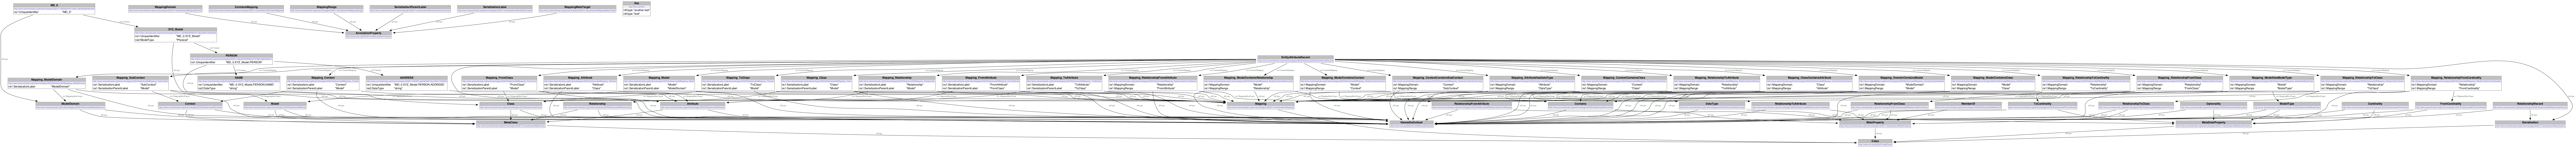

In [8]:
visualize(t2rdflibg(qr))

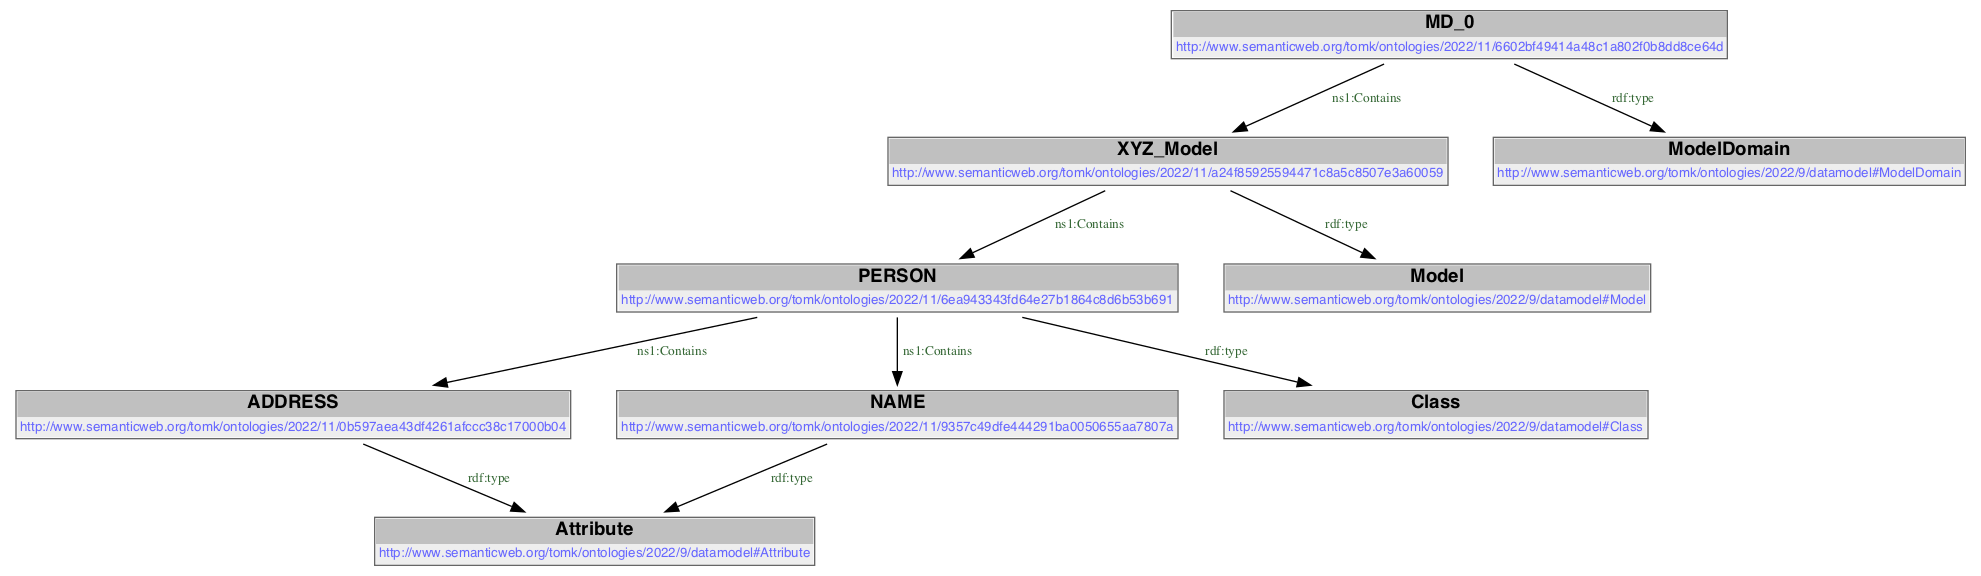

In [9]:

qr = g.query("""select ?s ?p ?o where 
    {
    { ?s ?p ?o. 
      VALUES ?p { datam:Contains }.
    }
    UNION
        { ?s ?p ?o. 
        ?s ?q ?x.
      VALUES ?q { datam:Contains }.
      VALUES ?p { rdfs:label }.
    }
    UNION
        { ?x ?q ?s. 
        ?s ?p ?o.
      VALUES ?q { datam:Contains }.
      VALUES ?p { rdfs:label }.
    }
    UNION
        { ?s ?p ?o. 
        ?s ?q ?x.
      VALUES ?q { datam:Contains }.
      VALUES ?p { rdf:type }.
    }

    UNION
        { ?x ?q ?s. 
        ?s ?p ?o.
      VALUES ?q { datam:Contains }.
      VALUES ?p { rdf:type }.
    }
    
    }
    """)

visualize(t2rdflibg(qr))

In [10]:
g.add((URIRef("http://this.com/this"), RDF.type, Literal("test")))
g.add((URIRef("http://this.com/this"), RDF.type, Literal("another test")))

In [11]:
qr = g.query("""select ?s ?p ?o where { ?s ?p ?o. }""")

In [12]:
qrs=list([r for r in qr])
qrs[-5:]

[(rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#MetaProperty'),
  rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'),
  rdflib.term.URIRef('http://www.w3.org/2002/07/owl#Class')),
 (rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/6602bf49414a48c1a802f0b8dd8ce64d'),
  rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Contains'),
  rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/a24f85925594471c8a5c8507e3a60059')),
 (rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/6602bf49414a48c1a802f0b8dd8ce64d'),
  rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#UniqueIdentifier'),
  rdflib.term.Literal('MD_0')),
 (rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/6602bf49414a48c1a802f0b8dd8ce64d'),
  rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#label'),
  rdflib.term.Literal('M

In [13]:
# Now, to load content, simply add it to the open fuseki-sourced ds/graph.

# job_def is in the form (Serialization, key, data )
#job_def_load_entities = ("Model Load", loader.onto.EntityAttributeRecord , serial_key, get_data_rows("model_entities.csv")  )
#batch_manifest = [job_def_load_entities]

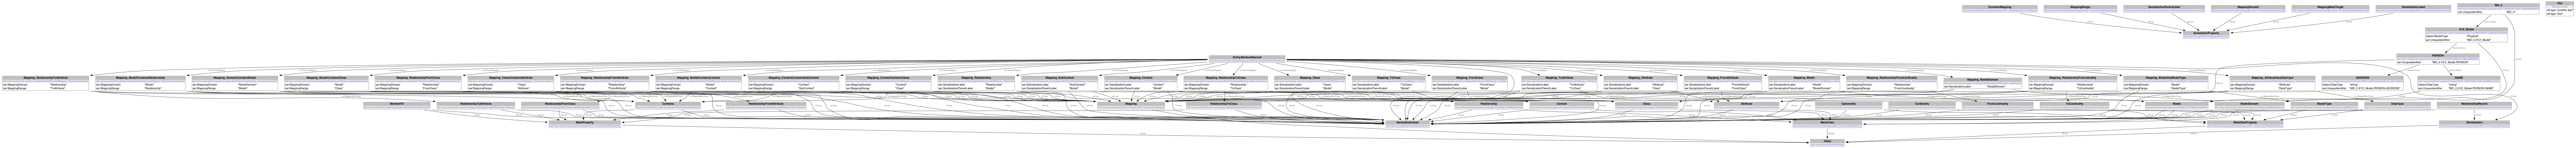

In [14]:
visualize(g)

In [15]:
qg = Graph()
qg.parse("EntityAttributeRecord.rdf")
triples=list(qg.triples((None, None, None)))
triple_types=[(type(t[0]), type(t[1]), type(t[2])) for t in triples]
set(triple_types)

{(rdflib.term.URIRef, rdflib.term.URIRef, rdflib.term.Literal),
 (rdflib.term.URIRef, rdflib.term.URIRef, rdflib.term.URIRef)}

In [16]:
for e,t in enumerate(triple_types):
    if t[0]==rdflib.term.BNode or t[2]==rdflib.term.BNode:
        print(e,t)
        print(list(triples)[e])

In [17]:
list(g.namespaces())

[('xml', rdflib.term.URIRef('http://www.w3.org/XML/1998/namespace')),
 ('rdf', rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#')),
 ('rdfs', rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#')),
 ('xsd', rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#')),
 ('', rdflib.term.URIRef('http://www.w3.org/2002/07/owl#')),
 ('ser',
  rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#')),
 ('datam',
  rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#')),
 ('ns1', rdflib.term.URIRef('http://this.com/'))]

In [18]:
temp_graph=Graph()

In [19]:
row = {"ModelDomain" : "MD_0", 
       "Model" : "XYZ_Model", 
       "ModelType" : "Physical",
       "Class" : "PERSON", 
       "Attribute" : "NAME", 
       "DataType" : "string"
       
       }

data = S.extract_raw_triples(row)

In [20]:
for t in data:
    temp_graph.add(t)

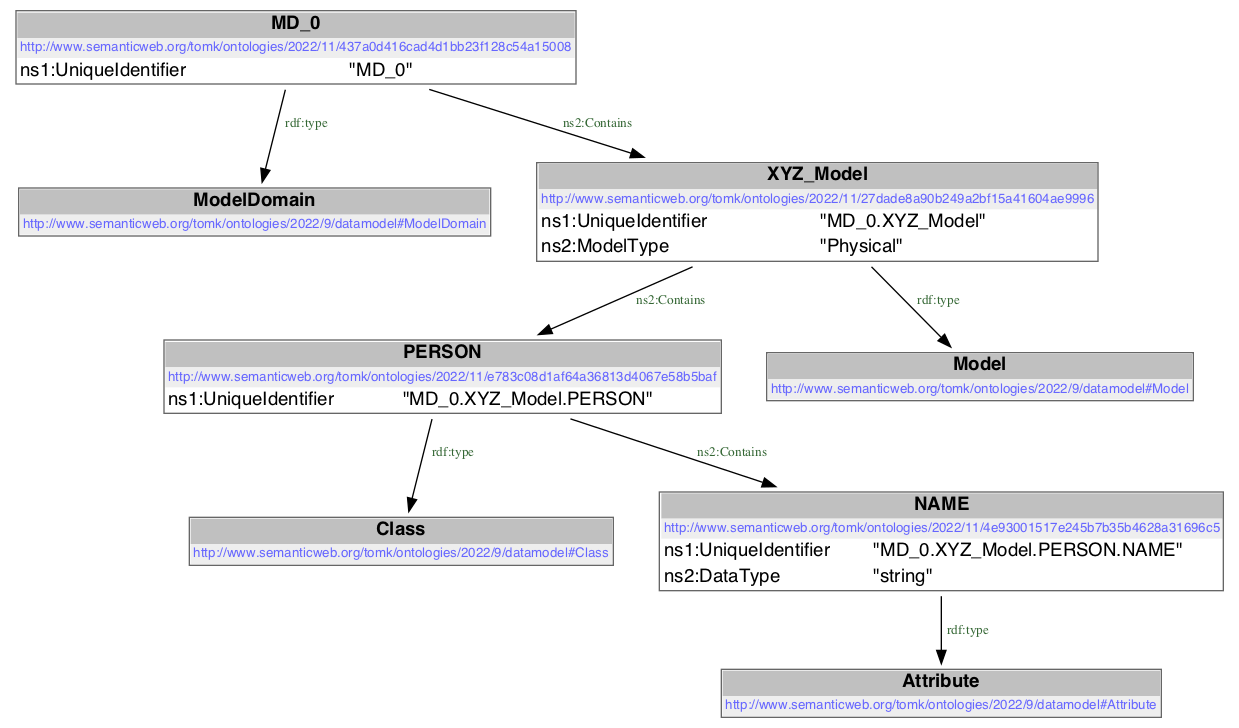

In [21]:
visualize(temp_graph)

In [22]:
# Naieve load-style of directly adding mastered triples directly to the database

for t in S.master_triples(g,data):
    g.add(t)

In [23]:
row = {"ModelDomain" : "MD_0", 
       "Model" : "XYZ_Model", 
       "ModelType" : "Physical",
       "Class" : "PERSON", 
       "Attribute" : "ADDRESS", 
       "DataType" : "string"
       
       }

data = S.extract_raw_triples(row)

In [24]:
# Naieve load-style of directly adding mastered triples directly to the database

for t in S.master_triples(g,data):
    g.add(t)

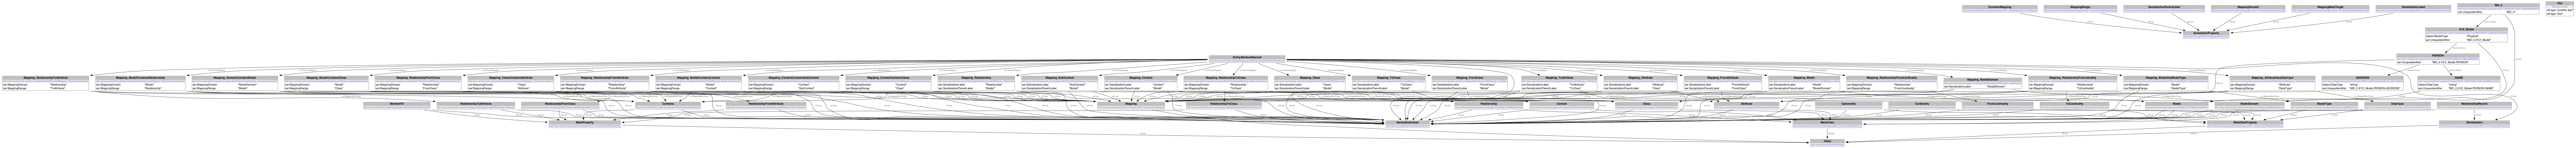

In [25]:
visualize(g)

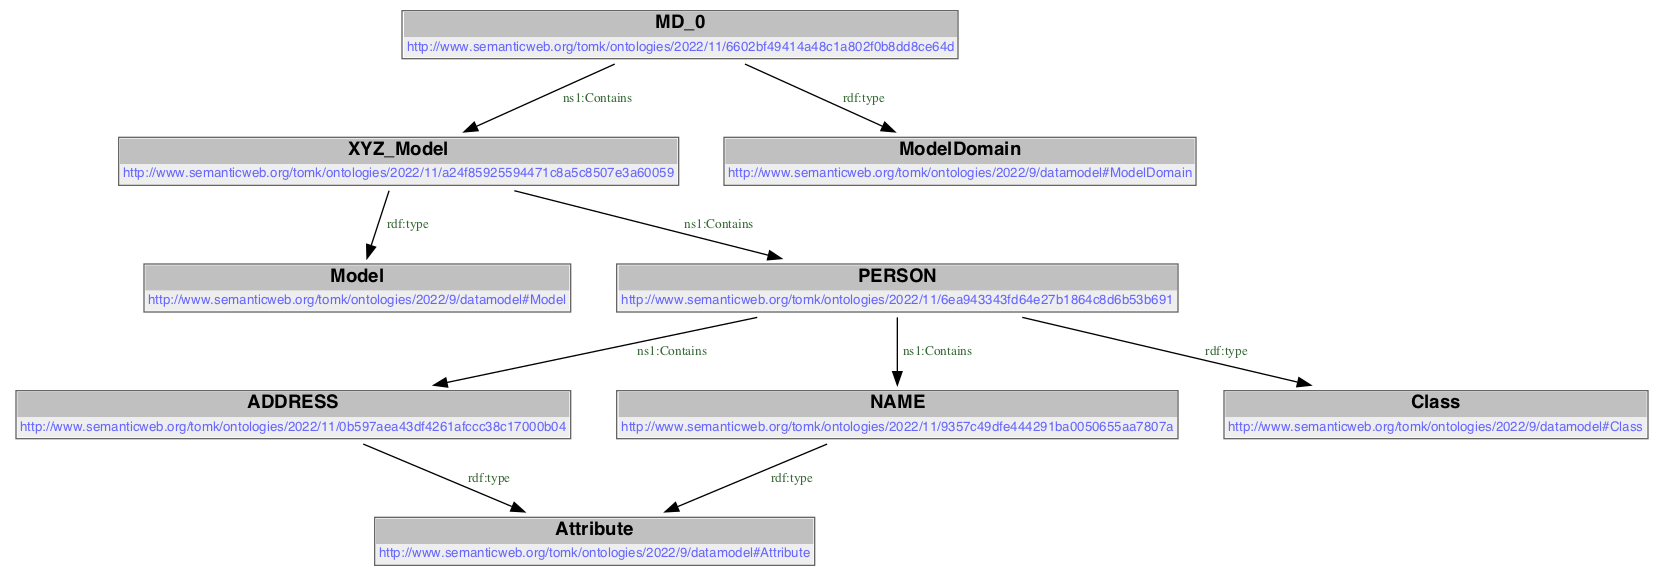

In [26]:

qr = g.query("""select ?s ?p ?o where 
    {
    { ?s ?p ?o. 
      VALUES ?p { datam:Contains }.
    }
    UNION
        { ?s ?p ?o. 
        ?s ?q ?x.
      VALUES ?q { datam:Contains }.
      VALUES ?p { rdfs:label }.
    }
    UNION
        { ?x ?q ?s. 
        ?s ?p ?o.
      VALUES ?q { datam:Contains }.
      VALUES ?p { rdfs:label }.
    }
    UNION
        { ?s ?p ?o. 
        ?s ?q ?x.
      VALUES ?q { datam:Contains }.
      VALUES ?p { rdf:type }.
    }

    UNION
        { ?x ?q ?s. 
        ?s ?p ?o.
      VALUES ?q { datam:Contains }.
      VALUES ?p { rdf:type }.
    }
    
    }
    """)

visualize(t2rdflibg(qr))

In [27]:
set([p[1] for p in list(t2rdflibg(qr))])

{rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Contains'),
 rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'),
 rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#label')}

In [28]:
discourse.Discourse.meta_payload_mappings

{'AuthorName': 'InterlocutorName_uri',
 'ClassificationTags': 'ClassificationTag_uri',
 'Version': 'Version_uri',
 'Title': 'Title_uri'}

In [37]:
d_meta = { "AuthorName" : "tomk", 
           "ClassificationTags" : ["Model", "Test"], 
           "Title" : "Data Model Content" , 
           "Version" : "0.001" 
           }

In [53]:
def discourse_from_triples(triples, discourse_payload=None):
    disco = discourse.Discourse("test",discourse_payload)
    posits=set()
    declars=set()
    for t in triples:
        posit = discourse.Posit(t)
        posits.add(posit)
        declar = discourse.Declaration(posit.uri)
        declars.add(declar)
        disco.add_member_uri(declar.uri)
    return disco

In [54]:
d = discourse_from_triples(S.master_triples(g,data))

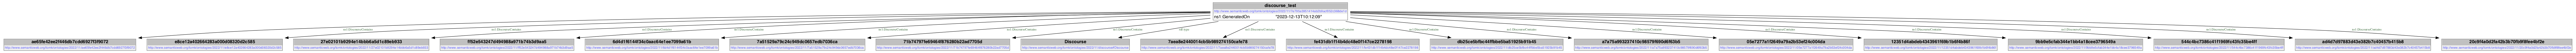

In [55]:
visualize(t2rdflibg(d.to_triples()))